<h1 style="font-size:3rem; color:blue;"> 1. Snow climatology using the product ESA CCI Viewable snow product level L3C daily from AVHRR over the period 1982-2019 in the Mediterranean area without imputation of missing data</h1>

## 1.1) Import python models 

In [2]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import netCDF4 as nc
from netCDF4 import Dataset
import datetime as dt
import calendar as cld
import matplotlib.pyplot as plt
import xarray as xr
from os import listdir
from os.path import isfile, join
import cartopy.crs as ccrs
import cartopy 
import proplot as plot  # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats
import sys

#import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
sys.path.insert(1, '/home/hamid/Desktop/results/') # to include my util file in previous directory
#u.check_python_version()
#u.check_virtual_memory()
#============================================================================
# Models for parallelisation
from dask.distributed import Client
from dask import delayed
from dask import compute
# client = Client(n_workers=4, threads_per_worker=3, memory_limit='4GB')
client = Client(n_workers=16, threads_per_worker=1, memory_limit='2GB')
# client = Client()
client


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 16
Total threads: 16,Total memory: 29.80 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46825,Workers: 16
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 29.80 GiB
Comm: tcp://127.0.0.1:37893,Total threads: 1
Dashboard: http://127.0.0.1:37477/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:34803,


In [3]:
client.close()

## 1.2) Check and import data 

In [4]:
# Define the path to your data
path_snow_CCI = '/home/hamid/Desktop/Data'

ds = xr.open_dataset(path_snow_CCI+'/scfv_atlas.nc')  #,  parallel=True)
# or 
#ds = xr.open_mfdataset(path+'/*.nc') # To import all file in one ds at once

print("==================================== scfv DB =========================================")
print(ds) 

==================================== scfv DB =========================================
<xarray.Dataset>
Dimensions:   (time: 13693, lon: 200, bnds: 2, lat: 160)
Coordinates:
  * time      (time) datetime64[ns] 1982-02-01 1982-02-02 ... 2019-12-31
  * lon       (lon) float64 -9.975 -9.925 -9.875 -9.825 ... -0.125 -0.075 -0.025
  * lat       (lat) float64 28.02 28.08 28.12 28.17 ... 35.83 35.88 35.92 35.97
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 ...
    lat_bnds  (lat, bnds) float64 ...
    scfv      (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                        Climate Data Interface version 1.9.9rc1 (http...
    Conventions:                CF-1.9
    history:                    Tue May 17 11:49:31 2022: cdo sellonlatbox,-1...
    source:                     AVHRR_NOAA-7_GAC mosaic from ESA Cloud CCI pr...
    institution:                Remote Sensing Research Group, Institute of G...
    title:                      ESA C

In [5]:
da = ds['scfv']
print("======================== scfv ============================")
print(da)

======================== scfv ============================
<xarray.DataArray 'scfv' (time: 13693, lat: 160, lon: 200)>
[438176000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1982-02-01 1982-02-02 ... 2019-12-31
  * lon      (lon) float64 -9.975 -9.925 -9.875 -9.825 ... -0.125 -0.075 -0.025
  * lat      (lat) float64 28.02 28.08 28.12 28.17 ... 35.83 35.88 35.92 35.97
Attributes:
    long_name:            Snow Cover Fraction Viewable
    units:                percent
    actual_range:         [  0 100]
    flag_values:          [205 206 210 215 254]
    flag_meanings:        Cloud Polar_Night_or_Night Water Permanent_Snow_and...
    ancillary_variables:  scfv_unc


In [53]:
da = da.sel(time=slice("2000-01-01","2019-12-31"))

In [54]:
scfv = da.where(da <= 100)

<h1 style="font-size:1.2rem; color:black;"> Global test </h1>

======================== scfv ============================


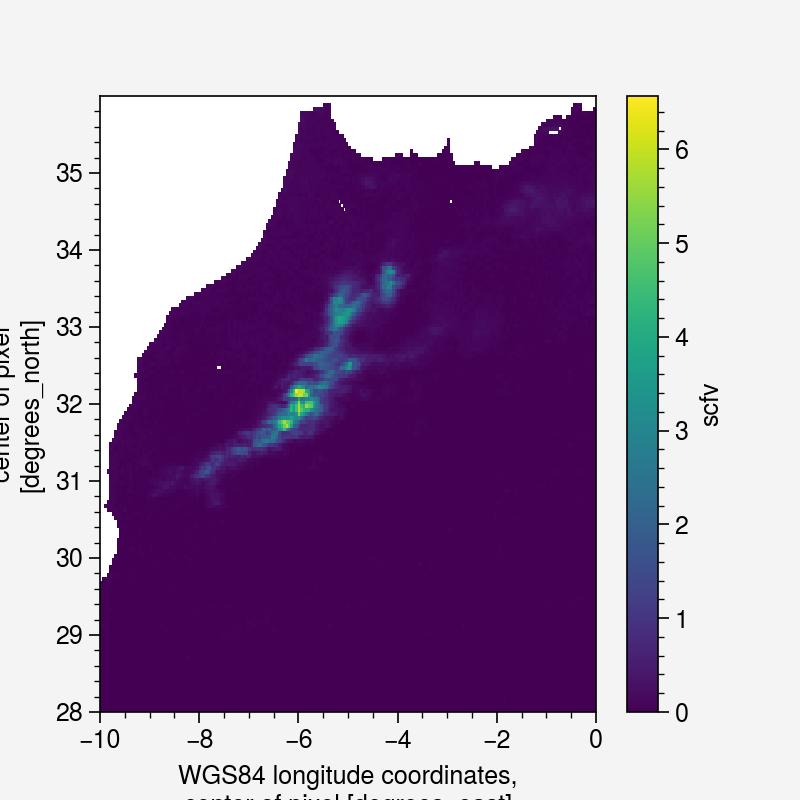

In [55]:
print("======================== scfv ============================")
scfv.mean('time').plot()

## 1.3) Data coverage

In [56]:
data_coverage = ((scfv.count('time') / scfv.time.size)*100).load()

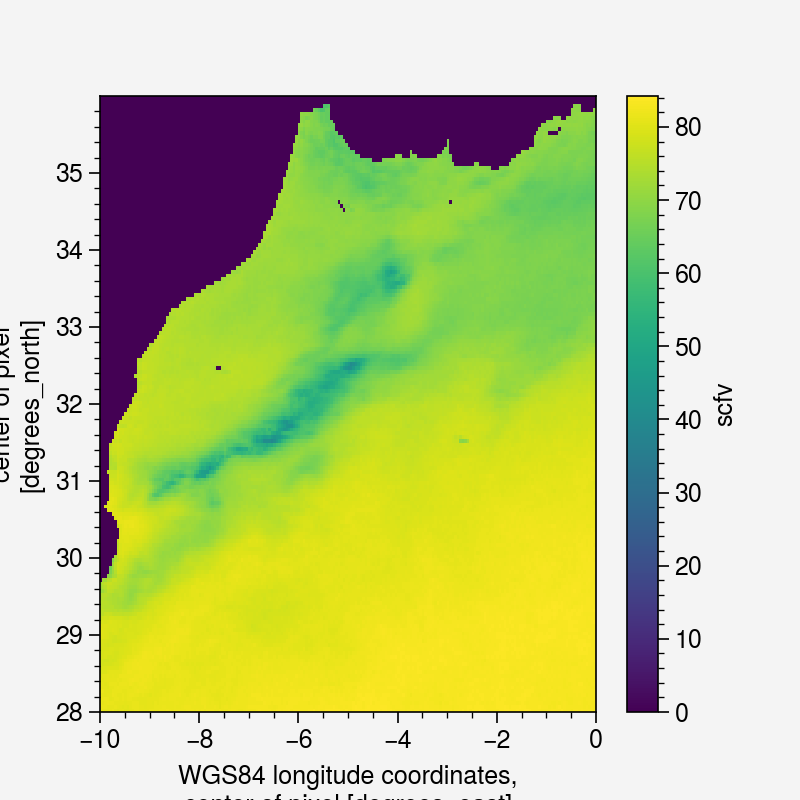

In [57]:
data_coverage.plot()  

<h1 style="font-size:1.2rem; color:black;"> Percentage of masked pixels per month   </h1>

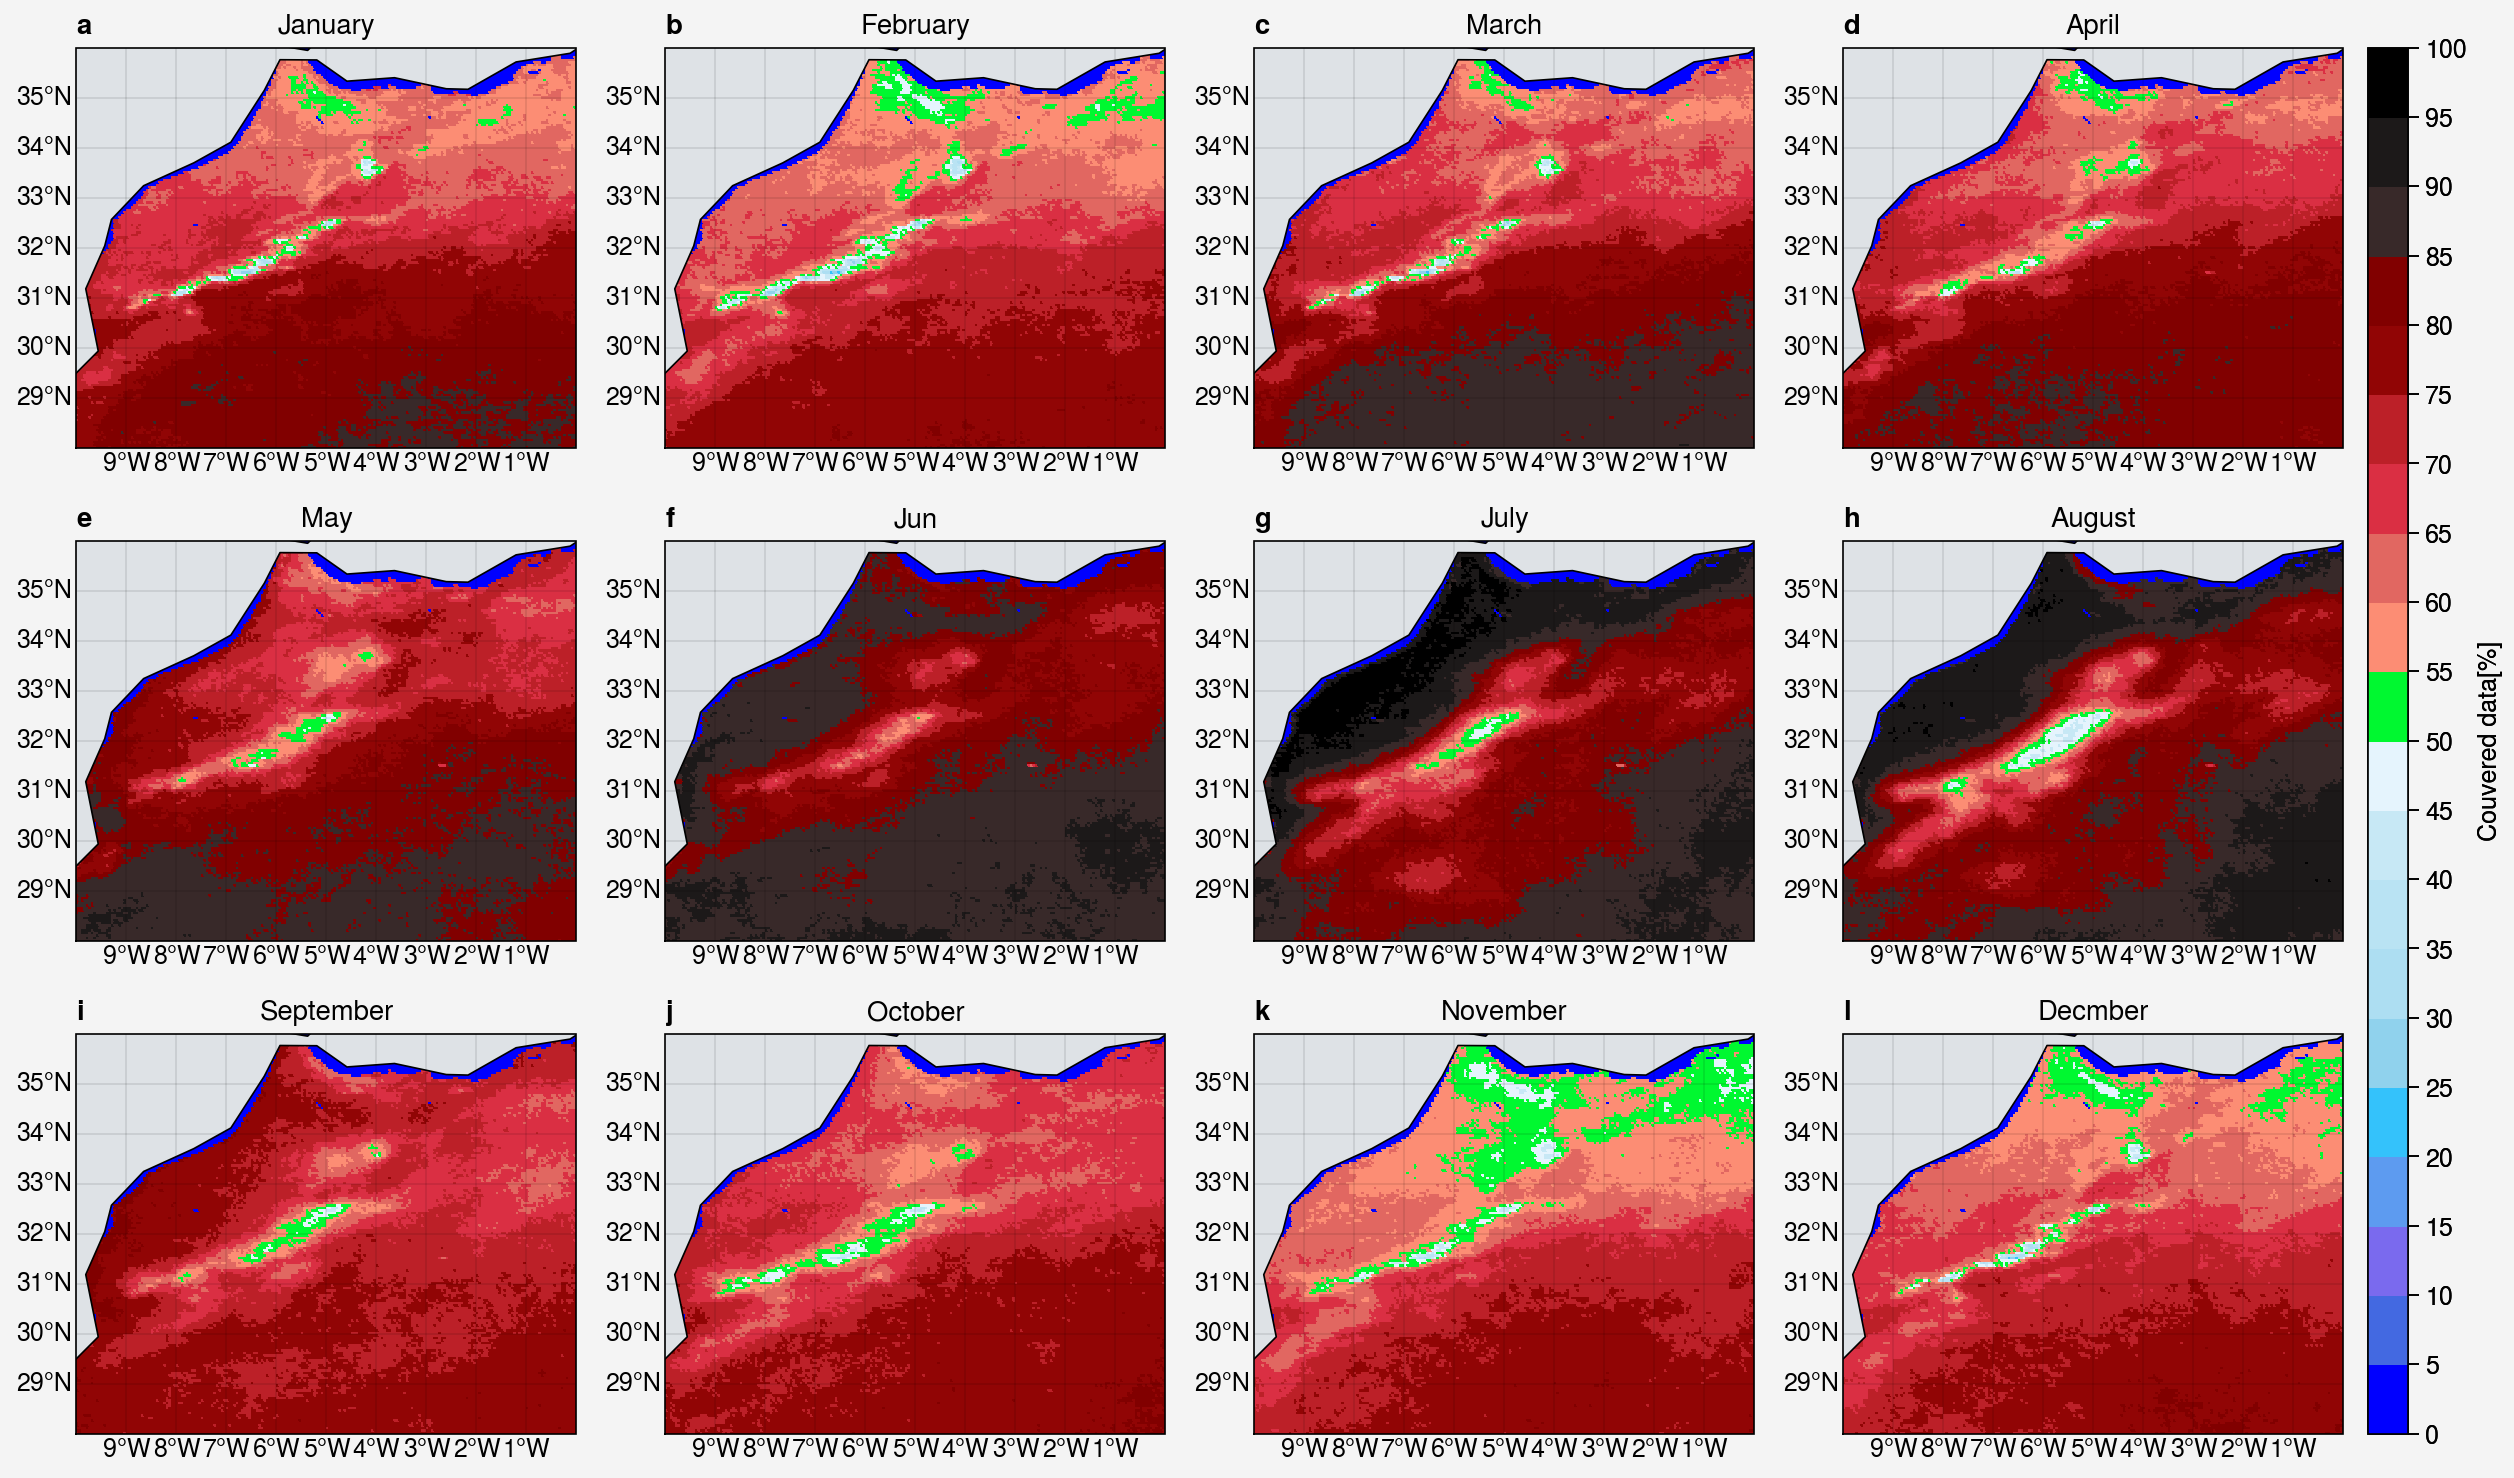

In [58]:
m1 = ((scfv.where(scfv['time.month']==1).count('time') / scfv.where(scfv['time.month']==1).time.size)*100*12).load()
m2 = ((scfv.where(scfv['time.month']==2).count('time') / scfv.where(scfv['time.month']==2).time.size)*100*12).load()
m3 = ((scfv.where(scfv['time.month']==3).count('time') / scfv.where(scfv['time.month']==3).time.size)*100*12).load()
m4 = ((scfv.where(scfv['time.month']==4).count('time') / scfv.where(scfv['time.month']==4).time.size)*100*12).load()
m5 = ((scfv.where(scfv['time.month']==5).count('time') / scfv.where(scfv['time.month']==5).time.size)*100*12).load()
m6 = ((scfv.where(scfv['time.month']==6).count('time') / scfv.where(scfv['time.month']==6).time.size)*100*12).load()
m7 = ((scfv.where(scfv['time.month']==7).count('time') / scfv.where(scfv['time.month']==7).time.size)*100*12).load()
m8 = ((scfv.where(scfv['time.month']==8).count('time') / scfv.where(scfv['time.month']==8).time.size)*100*12).load()
m9 = ((scfv.where(scfv['time.month']==9).count('time') / scfv.where(scfv['time.month']==9).time.size)*100*12).load()
m10 = ((scfv.where(scfv['time.month']==10).count('time') / scfv.where(scfv['time.month']==10).time.size)*100*12).load()
m11 = ((scfv.where(scfv['time.month']==11).count('time') / scfv.where(scfv['time.month']==11).time.size)*100*12).load()
m12 = ((scfv.where(scfv['time.month']==12).count('time') / scfv.where(scfv['time.month']==12).time.size)*100*12).load()

cmap=["#0000FF","#4169E1","#7B68EE","#6495ED","#00BFFF","#87ceeb","#a9dcf1","#b9e3f3","#b9e3f3","#dbf0f9",
"#F0F8FF", "#FFA07A", "#FA8072", "#CD5C5C", "#DC143C","#B22222", "#8B0000", "#800000","#352929","#1C1919","#000000"]
#levels=[0, 5, 10, 15,20, 25, 30, 35, 40, 45,50 ,55 , 60,65,70,75, 80,85,90,95, 100]
levels=[0,5,10,15,20,25, 30,35,40,45,50,55, 60,65, 70,75,80,85, 90,95, 100]            
var_label = 'Couvered data[%]'
f, axs = plot.subplots(proj='cyl', ncols=4, nrows=3)

mon = {1: "January", 2:"February", 3:"March", 4:"April", 5: "May", 6:"Jun", 7:"July", 8:"August", 9:"September",10:"October", 11:"November", 12:"Decmber"}   
var = {1: m1, 2:m2, 3:m3, 4:m4, 5: m5, 6:m6, 7:m7, 8:m8, 9:m9,10:m10, 11:m11, 12:m12}    
for i, ax in enumerate(axs):
    m = ax.pcolormesh(  
        var[i+1], 
        cmap=cmap,
        levels=levels,
        extend='neither'
        )
    ax.format(title=mon[i+1])
    
f.colorbar(m, label=var_label)    
axs.format(
    labels=True,                    
    coast=True, ocean=True, oceancolor='gray3', borders=False,
    lonlines=1, latlines=1, abc=True, latlim=(28, 36), lonlim=(-10, 0)
)

plt.show()
#f.save('/home/hamid/Desktop/results/percentage_masked_pixels_1982-2019.jpg')

  ## 1.4) Subset (In case the input data is global)

In [12]:
# In case, the input data is global
# For Moroccan Atlas
latlim = slice(28,36)
lonlim = slice(-10, 0)

scfv_subset = da.sel(lat=latlim, lon=lonlim).load()

In [ ]:
scfv_subset.mean('time').plot()

In [ ]:
data_coverage = ((scfv_subset.count('time') / scfv.time.size)*100)
data_coverage.name = 'Data coverage'
data_coverage.attrs['units'] = '%'

data_coverage.plot(levels=plot.arange(0, 100, 20))

<h1 style="font-size:1.2rem; color:black;"> percentage of masked pixels per month   </h1>

In [ ]:
...

## 1.5) Calculation of monthly, seasonal and yearly averages over the period 1982-2019 

<h1 style="font-size:1.2rem; color:black;"> Monthly average plote </h1> 

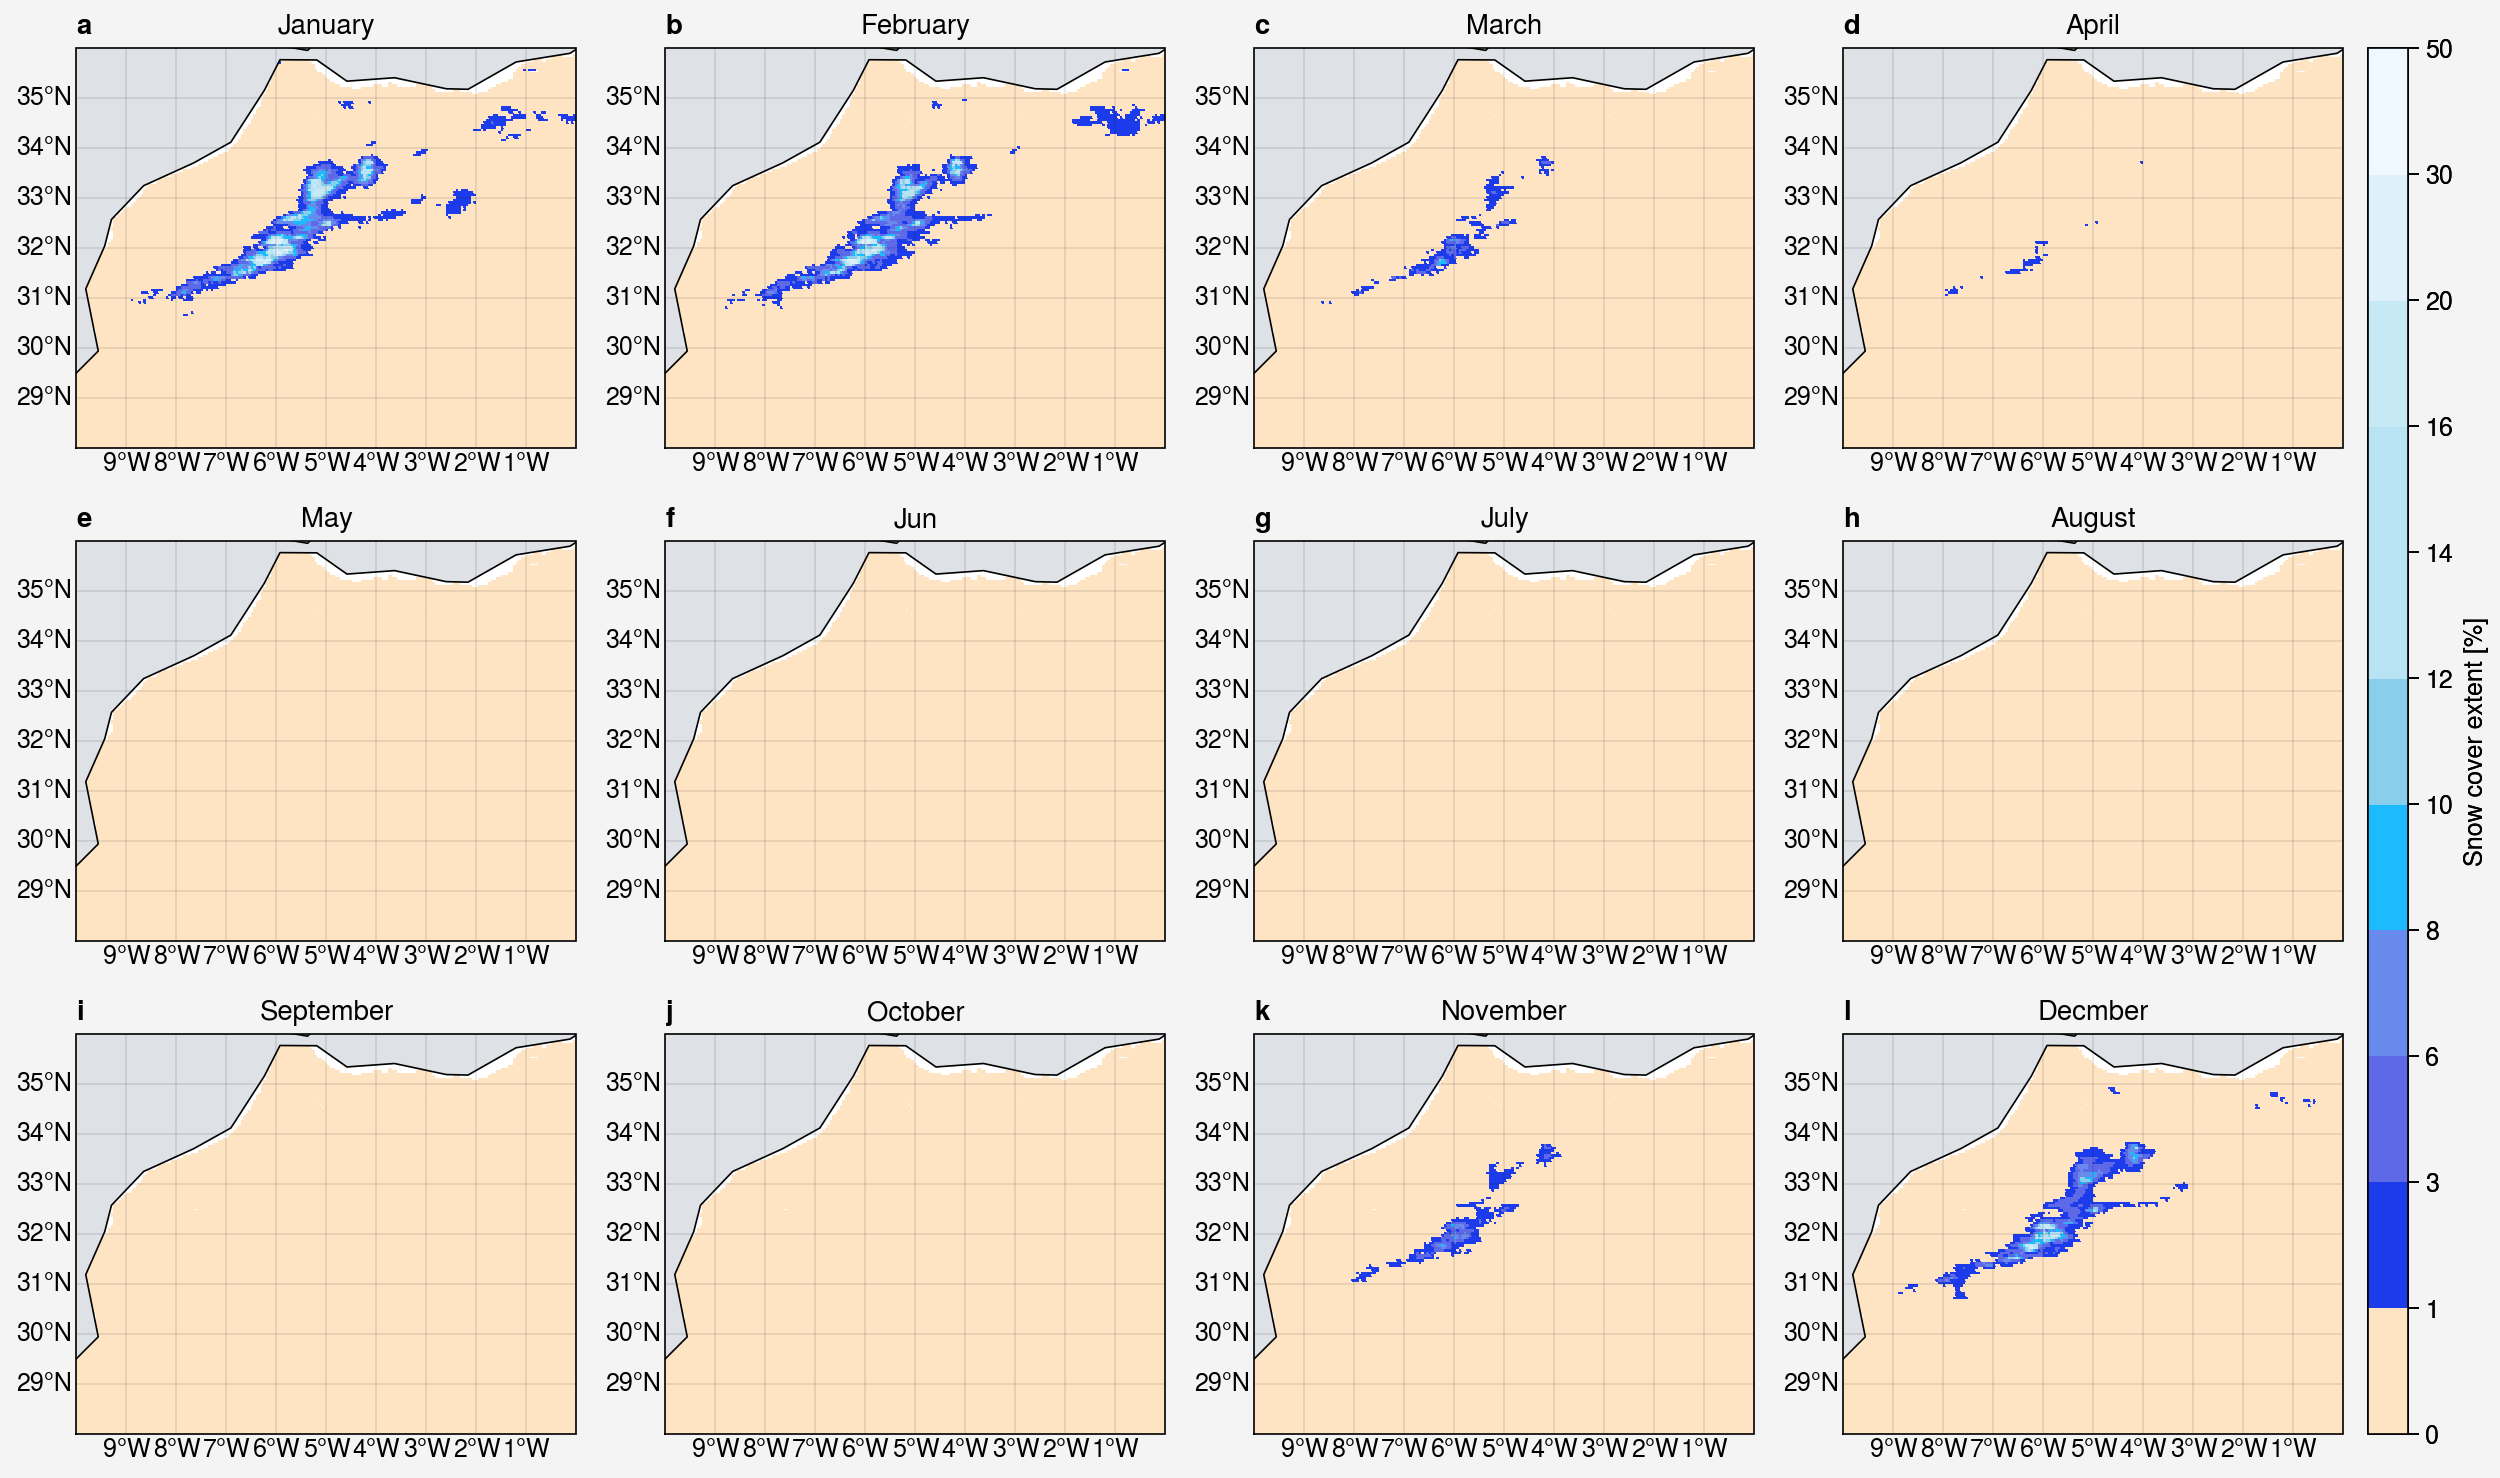

In [59]:
aux = scfv.groupby('time.month').mean(dim='time')

cmap=["bisque","#0000FF","#4169E1","#7B68EE","#6495ED","#00BFFF","#87ceeb","#b9e3f3","#b9e3f3","#dbf0f9",
"#F0F8FF"]
levels=[0, 1, 3, 6,8,10,12,14,16,20,30,50]          
var_label = 'Snow cover extent [%]'

f, axs = plot.subplots(proj='cyl', ncols=4, nrows=3)

dic = {1: "January", 2:"February", 3:"March", 4:"April", 5: "May", 6:"Jun", 7:"July", 8:"August", 9:"September",10:"October", 11:"November", 12:"Decmber"}   
for i, ax in enumerate(axs):
    m = ax.pcolormesh(  
        aux[i,:,:], 
        cmap=cmap,
        levels=levels,
        extend='neither'
        )
    ax.format(title=dic[i+1])
    
f.colorbar(m, label=var_label)

axs.format(  
    labels=True,                    
    coast=True, ocean=True, oceancolor='gray3', borders=False,
    lonlines=1, latlines=1, abc=True, latlim=(28, 36), lonlim=(-10, 0)
)

plt.show()
#f.save('/home/hamid/Desktop/results/scfv_mon_mean_1982-2019.jpg')


<h1 style="font-size:1.2rem; color:black;"> Seasonal average plote </h1>  

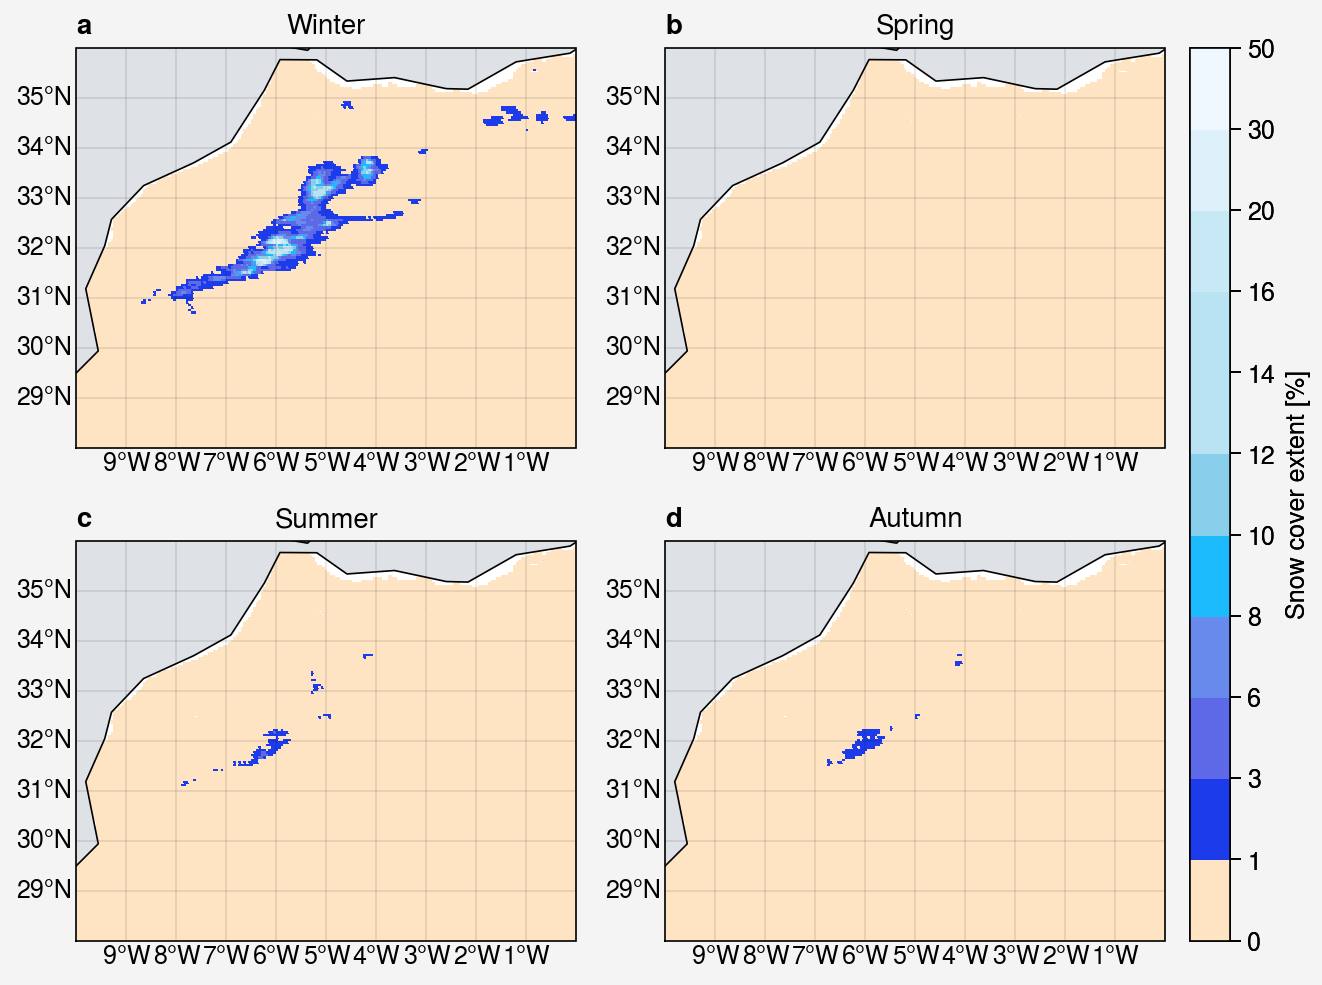

In [60]:
aux = scfv.groupby('time.season').mean(dim='time')

cmap=["bisque","#0000FF","#4169E1","#7B68EE","#6495ED","#00BFFF","#87ceeb","#b9e3f3","#b9e3f3","#dbf0f9",
"#F0F8FF"]
levels=[0, 1, 3, 6,8,10,12,14,16,20,30,50]          
var_label = 'Snow cover extent [%]'

f, axs = plot.subplots(proj='cyl', ncols=2, nrows=2)

dic = {1: "Winter", 2:"Spring", 3:"Summer", 4:"Autumn"}   
for i, ax in enumerate(axs):
    m = ax.pcolormesh(  
        aux[i,:,:], 
        cmap=cmap,
        levels=levels,
        extend='neither'
        )
    ax.format(title=dic[i+1])
    
f.colorbar(m, label=var_label)

axs.format(          
    labels=True,                    
    coast=True, ocean=True, oceancolor='gray3', borders=False,
    lonlines=1, latlines=1, abc=True, latlim=(28, 36), lonlim=(-10, 0)
)

plt.show()
#f.save('/home/hamid/Desktop/results/scfv_seas_mean_1982-2019_Atlas.jpg')

<h1 style="font-size:1.2rem; color:black;"> Slippery seasons plote </h1> 

In [ ]:
Winter = ds.scfv[[8,9,10],:,:].mean(dim='month')
Spring = ds.scfv[[11,0,1],:,:].mean(dim='month')
Summer = ds.scfv[[2,3,4],:,:].mean(dim='month')
Autumn = ds.scfv[[5,6,7],:,:].mean(dim='month')


cmap=["bisque","#0009FF", "#3940FF", "#575CFF", "#7378FF", "#9093FF","#ACAFFF", "#C9CAFF","#E5E6FF","#F7F9FF", "#FFFFFF"]
levels=[0, 2, 5, 10, 15, 25, 30, 35, 40, 60, 80, 100]          
var_label = 'Snow cover extent [%]'

f, axs = plot.subplots(proj='cyl', ncols=2, nrows=2)

seas = {1: Winter, 2:Spring, 3:Summer, 4:Autumn} 
dic = {1: "Winter", 2:"Spring", 3:"Summer", 4:"Autumn"}   
for i, ax in enumerate(axs):
    m = ax.pcolormesh(  
        seas[i+1], 
        cmap=cmap,
        levels=levels,
        extend='neither'
        )
    ax.format(title=dic[i+1])
    
f.colorbar(m, label=var_label)

axs.format(
    labels=True,                    
    coast=True, ocean=True, oceancolor='gray3', borders=False,
    lonlines=10, latlines=10, abc=True, latlim=(15, 50), lonlim=(-20, 40)
)

plt.show()
f.save('/home/hamid/Desktop/results/scfv_seas_gliss_mean_wintet_9_10_11.jpg')

<h1 style="font-size:1.2rem; color:black;"> Yearly average plot </h1>  

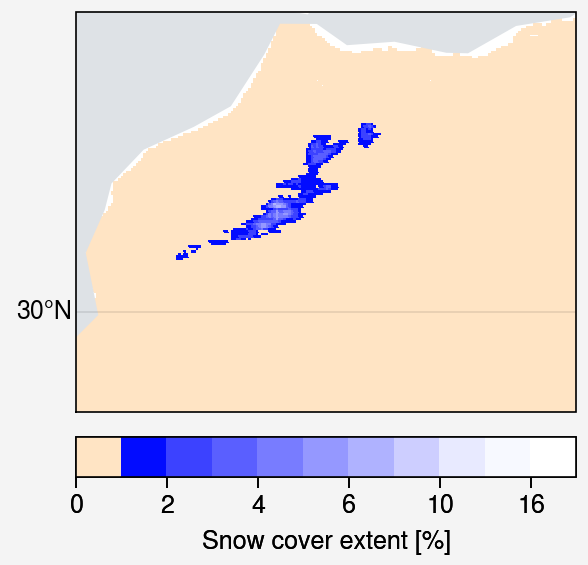

In [61]:
#ds = ds.sel(time=slice("1982-02-01","2019-12-31"))
aux = scfv.mean(dim='time')

cmap=["bisque","#0009FF", "#3940FF", "#575CFF", "#7378FF", "#9093FF","#ACAFFF", "#C9CAFF","#E5E6FF","#F7F9FF", "#FFFFFF"]
levels=[0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 16, 20]          
var_label = 'Snow cover extent [%]'

f, ax = plot.subplots(proj='cyl', ncols=1, nrows=1)

m = ax.pcolormesh(aux, cmap=cmap, levels=levels, extend='neither')
ax.format(title="")
    
f.colorbar(m, label=var_label, orientation='horizontal', location='bottom')

ax.format(
    labels=True,                    
    coast=False, ocean=True, oceancolor='gray3', borders=False,
    lonlines=10, latlines=10, abc=False, latlim=(28, 36), lonlim=(-10, 0)
)

plt.show()



## 1.6) Calculate and plote of trends over the period 1982-2019

<h1 style="font-size:1.2rem; color:black;"> Seasonal trends   </h1>   

In [62]:
aux=scfv
seas_scfv=np.empty(shape=(20,4,aux.shape[1],aux.shape[2]), dtype=float)
print(seas_scfv.shape)

(20, 4, 160, 200)


In [63]:
print(aux.where(aux['time.season'] == 'DJF').groupby('time.year').mean(dim='time'))

<xarray.DataArray 'scfv' (year: 20, lat: 160, lon: 200)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [       nan,        nan,        nan, ...,        nan

In [64]:
seas_scfv [:,0,:,:] = aux.where(aux['time.season'] == 'DJF').groupby('time.year').mean(dim='time')
print("done")
seas_scfv [:,1,:,:] = aux.where(aux['time.season'] == 'MAM').groupby('time.year').mean(dim='time')
print("done")
seas_scfv [:,2,:,:] = aux.where(aux['time.season'] == 'JJA').groupby('time.year').mean(dim='time')
print("done")
seas_scfv [:,3,:,:] = aux.where(aux['time.season'] == 'SON').groupby('time.year').mean(dim='time')
print("done")

done
done
done
done


In [65]:
# Computing trends    
slope_scfv=np.full(seas_scfv.shape[1:4], np.nan)
pvalue_scfv=np.full(seas_scfv.shape[1:4], np.nan)  
for lon in range(seas_scfv.shape[3]):                        
    print(str(lon)+'/'+str(seas_scfv.shape[3]))
    for lat in range(seas_scfv.shape[2]):
        for seas in range(4):
            linregress_scfv = stats.linregress(range(seas_scfv.shape[0]-1), seas_scfv[1:,seas,lat,lon])
            slope_scfv[seas][lat][lon] = linregress_scfv.slope
            pvalue_scfv[seas][lat][lon] = linregress_scfv.pvalue

0/200
1/200
2/200
3/200
4/200
5/200
6/200
7/200
8/200
9/200
10/200
11/200
12/200
13/200
14/200
15/200
16/200
17/200
18/200
19/200
20/200
21/200
22/200
23/200
24/200
25/200
26/200
27/200
28/200
29/200
30/200
31/200
32/200
33/200
34/200
35/200
36/200
37/200
38/200
39/200
40/200
41/200
42/200
43/200
44/200
45/200
46/200
47/200
48/200
49/200
50/200
51/200
52/200
53/200
54/200
55/200
56/200
57/200
58/200
59/200
60/200
61/200
62/200
63/200
64/200
65/200
66/200
67/200
68/200
69/200
70/200
71/200
72/200
73/200
74/200
75/200
76/200
77/200
78/200
79/200
80/200
81/200
82/200
83/200
84/200
85/200
86/200
87/200
88/200
89/200
90/200
91/200
92/200
93/200
94/200
95/200
96/200
97/200
98/200
99/200
100/200
101/200
102/200
103/200
104/200
105/200
106/200
107/200
108/200
109/200
110/200
111/200
112/200
113/200
114/200
115/200
116/200
117/200
118/200
119/200
120/200
121/200
122/200
123/200
124/200
125/200
126/200
127/200
128/200
129/200
130/200
131/200
132/200
133/200
134/200
135/200
136/200
137/200
138/20

In [66]:
print("=========================== slope_scfv ===============================")
print(slope_scfv)
print("=========================== pvalue_scfv ===============================")
print(pvalue_scfv)

=========================== slope_scfv ===============================
[[[ 0.00000000e+00  3.43249417e-03  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-7.11924727e-04  9.02917129e-03  3.34771197e-20 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.77192982e-03
    8.77192982e-03  8.65946893e-03]
  [ 0.00000000e+00 -1.11455114e-02 -1.52555303e-02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.0000000

i=0
ax=<_CartopyAxesSubplot:label='subplot_1'>
i=1
ax=<_CartopyAxesSubplot:label='subplot_2'>
i=2
ax=<_CartopyAxesSubplot:label='subplot_3'>
i=3
ax=<_CartopyAxesSubplot:label='subplot_4'>


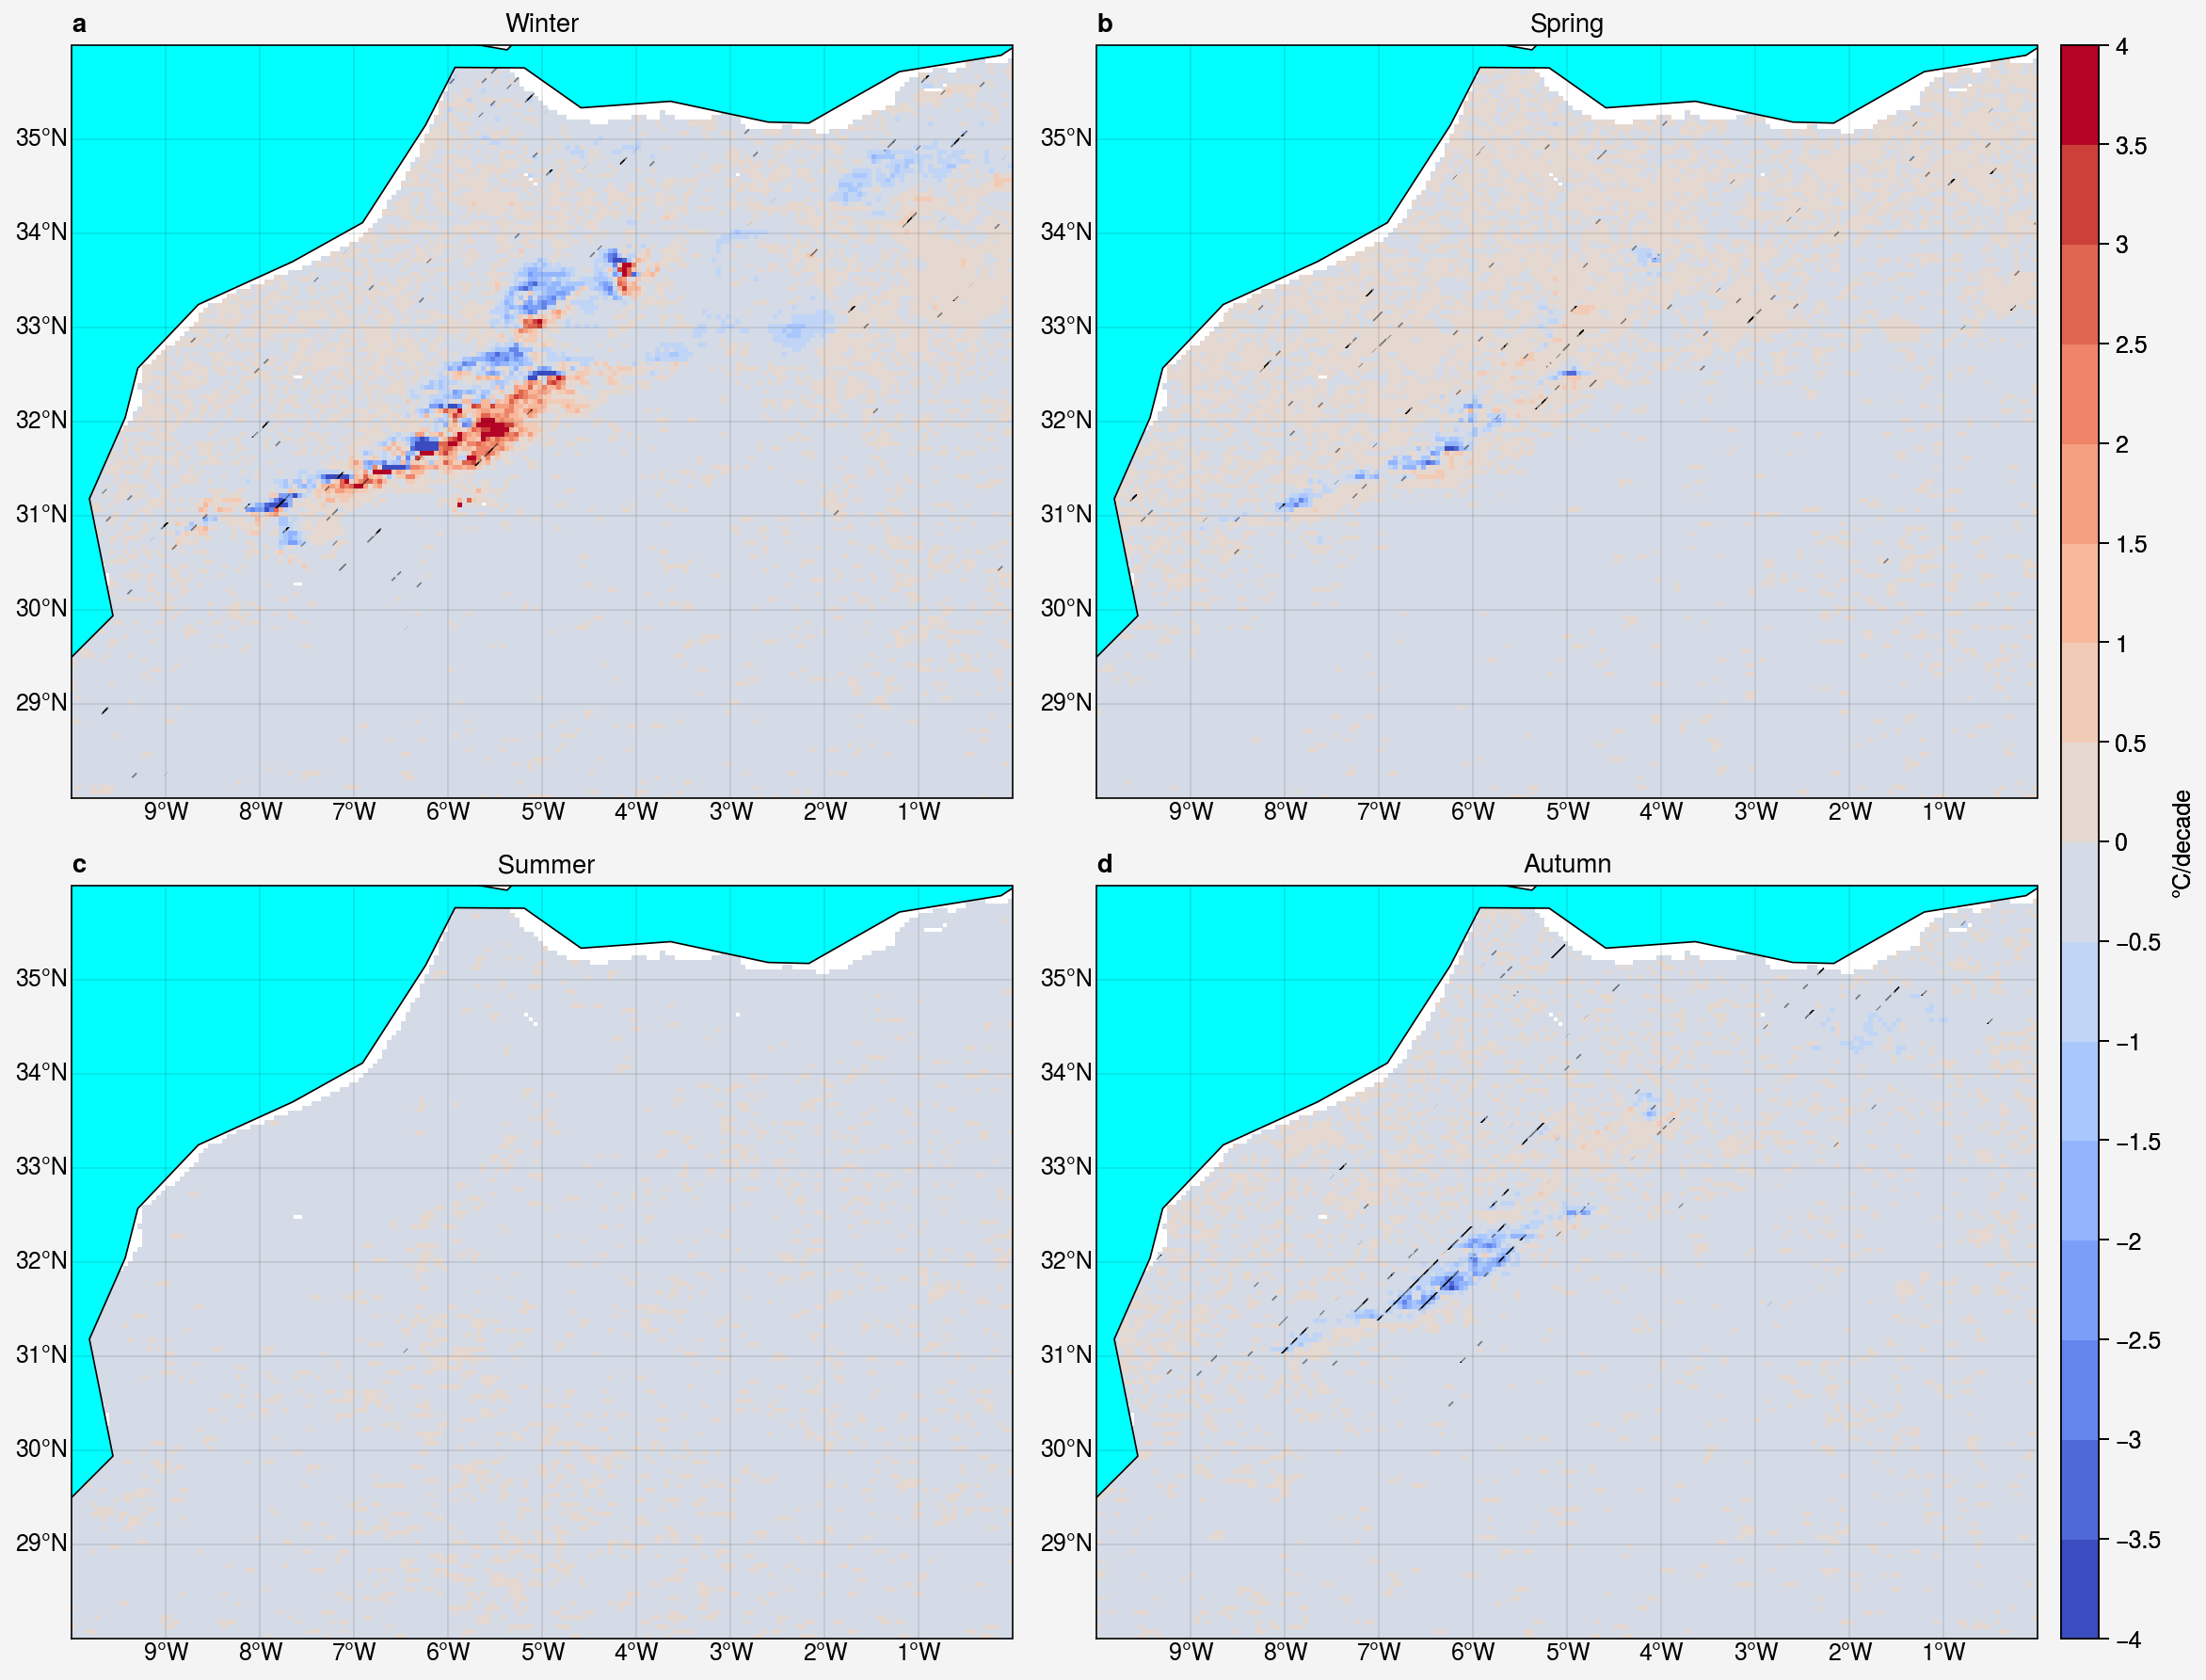

In [67]:
# Plote
# 1) # Masking significativity
signif=np.where(pvalue_scfv<0.05, True,False)

# Levels of scfv for the plot
levels=np.arange(-4,4.5,0.5)
factor=10 # degree per decade

title={1:"Winter",2:"Spring",3:" Summer",4:"Autumn"}
# Producing the map of the trends, excluding the borders of the domain.
f, axs = plot.subplots(proj='cyl',ncols=2, nrows=2, share=1, axwidth=5)
for i, ax in enumerate(axs):
    print('i='+str(i))
    print('ax='+str(ax))
    m = ax.pcolormesh(
        scfv.lon,scfv.lat,
        slope_scfv[i,:,:]*factor,
        levels=levels,
        cmap='coolwarm'  
    )
    ax.format(title=title[i+1])   # font.largesize=='20px'
    
    p = ax.contourf(
    scfv.lon,scfv.lat,
    signif[i,:,:],
    hatches=["", "//"], alpha=0
    )
    
f.colorbar(m, label= '°C/decade')

axs.format(
    labels=True,
    coast=True, ocean=True, oceancolor='cyan', landcolor='bisque',borders=False,
    lonlines=1, latlines=1, abc=True, latlim=(28, 36), lonlim=(-10, 0)
)

plt.show()

## =================================================================

<h1 style="font-size:1.2rem; color:black;"> Monthly trends   </h1>   

In [68]:
aux=scfv
mon_scfv=np.empty(shape=(20,6,aux.shape[1],aux.shape[2]), dtype=float)
print(mon_scfv.shape)

(20, 6, 160, 200)


In [69]:
mon_scfv [:,0,:,:] = aux.where(aux['time.month'] == 1).groupby('time.year').mean(dim='time')
print("done")
mon_scfv [:,1,:,:] = aux.where(aux['time.month'] == 2).groupby('time.year').mean(dim='time')
print("done")
mon_scfv [:,2,:,:] = aux.where(aux['time.month'] == 3).groupby('time.year').mean(dim='time')
print("done")
mon_scfv [:,3,:,:] = aux.where(aux['time.month'] == 4).groupby('time.year').mean(dim='time')
print("done")
"""
mon_scfv [:,4,:,:] = aux.where(aux['time.month'] == 5).groupby('time.year').mean(dim='time')
print("done")
mon_scfv [:,5,:,:] = aux.where(aux['time.month'] == 6).groupby('time.year').mean(dim='time')
print("done")
mon_scfv [:,6,:,:] = aux.where(aux['time.month'] == 7).groupby('time.year').mean(dim='time')
print("done")
mon_scfv [:,7,:,:] = aux.where(aux['time.month'] == 8).groupby('time.year').mean(dim='time')
print("done")
mon_scfv [:,8,:,:] = aux.where(aux['time.month'] == 9).groupby('time.year').mean(dim='time')
print("done")
mon_scfv [:,9,:,:] = aux.where(aux['time.month'] == 10).groupby('time.year').mean(dim='time')
print("done")
"""
mon_scfv [:,4,:,:] = aux.where(aux['time.month'] == 11).groupby('time.year').mean(dim='time')
print("done")
mon_scfv [:,5,:,:] = aux.where(aux['time.month'] == 12).groupby('time.year').mean(dim='time')
print("done")

done
done
done
done
done
done


In [70]:
# Computing trends    
slope_scfv=np.full(mon_scfv.shape[1:4], np.nan)
pvalue_scfv=np.full(mon_scfv.shape[1:4], np.nan)  
for lon in range(mon_scfv.shape[3]):                        
    print(str(lon)+'/'+str(mon_scfv.shape[3]))
    for lat in range(mon_scfv.shape[2]):
        for mon in range(6):
            linregress_scfv = stats.linregress(range(mon_scfv.shape[0]-1), mon_scfv[1:,mon,lat,lon])
            slope_scfv[mon][lat][lon] = linregress_scfv.slope
            pvalue_scfv[mon][lat][lon] = linregress_scfv.pvalue

0/200
1/200
2/200
3/200
4/200
5/200
6/200
7/200
8/200
9/200
10/200
11/200
12/200
13/200
14/200
15/200
16/200
17/200
18/200
19/200
20/200
21/200
22/200
23/200
24/200
25/200
26/200
27/200
28/200
29/200
30/200
31/200
32/200
33/200
34/200
35/200
36/200
37/200
38/200
39/200
40/200
41/200
42/200
43/200
44/200
45/200
46/200
47/200
48/200
49/200
50/200
51/200
52/200
53/200
54/200
55/200
56/200
57/200
58/200
59/200
60/200
61/200
62/200
63/200
64/200
65/200
66/200
67/200
68/200
69/200
70/200
71/200
72/200
73/200
74/200
75/200
76/200
77/200
78/200
79/200
80/200
81/200
82/200
83/200
84/200
85/200
86/200
87/200
88/200
89/200
90/200
91/200
92/200
93/200
94/200
95/200
96/200
97/200
98/200
99/200
100/200
101/200
102/200
103/200
104/200
105/200
106/200
107/200
108/200
109/200
110/200
111/200
112/200
113/200
114/200
115/200
116/200
117/200
118/200
119/200
120/200
121/200
122/200
123/200
124/200
125/200
126/200
127/200
128/200
129/200
130/200
131/200
132/200
133/200
134/200
135/200
136/200
137/200
138/20

In [71]:
print("=========================== slope_scfv ===============================")
print(slope_scfv)
print("=========================== pvalue_scfv ===============================")
print(pvalue_scfv)

=========================== slope_scfv ===============================
[[[ 0.00000000e+00  2.25563915e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-1.81936318e-03  2.23643717e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.0000000

i=0
ax=<_CartopyAxesSubplot:label='subplot_1'>
i=1
ax=<_CartopyAxesSubplot:label='subplot_2'>
i=2
ax=<_CartopyAxesSubplot:label='subplot_3'>
i=3
ax=<_CartopyAxesSubplot:label='subplot_4'>
i=4
ax=<_CartopyAxesSubplot:label='subplot_5'>
i=5
ax=<_CartopyAxesSubplot:label='subplot_6'>


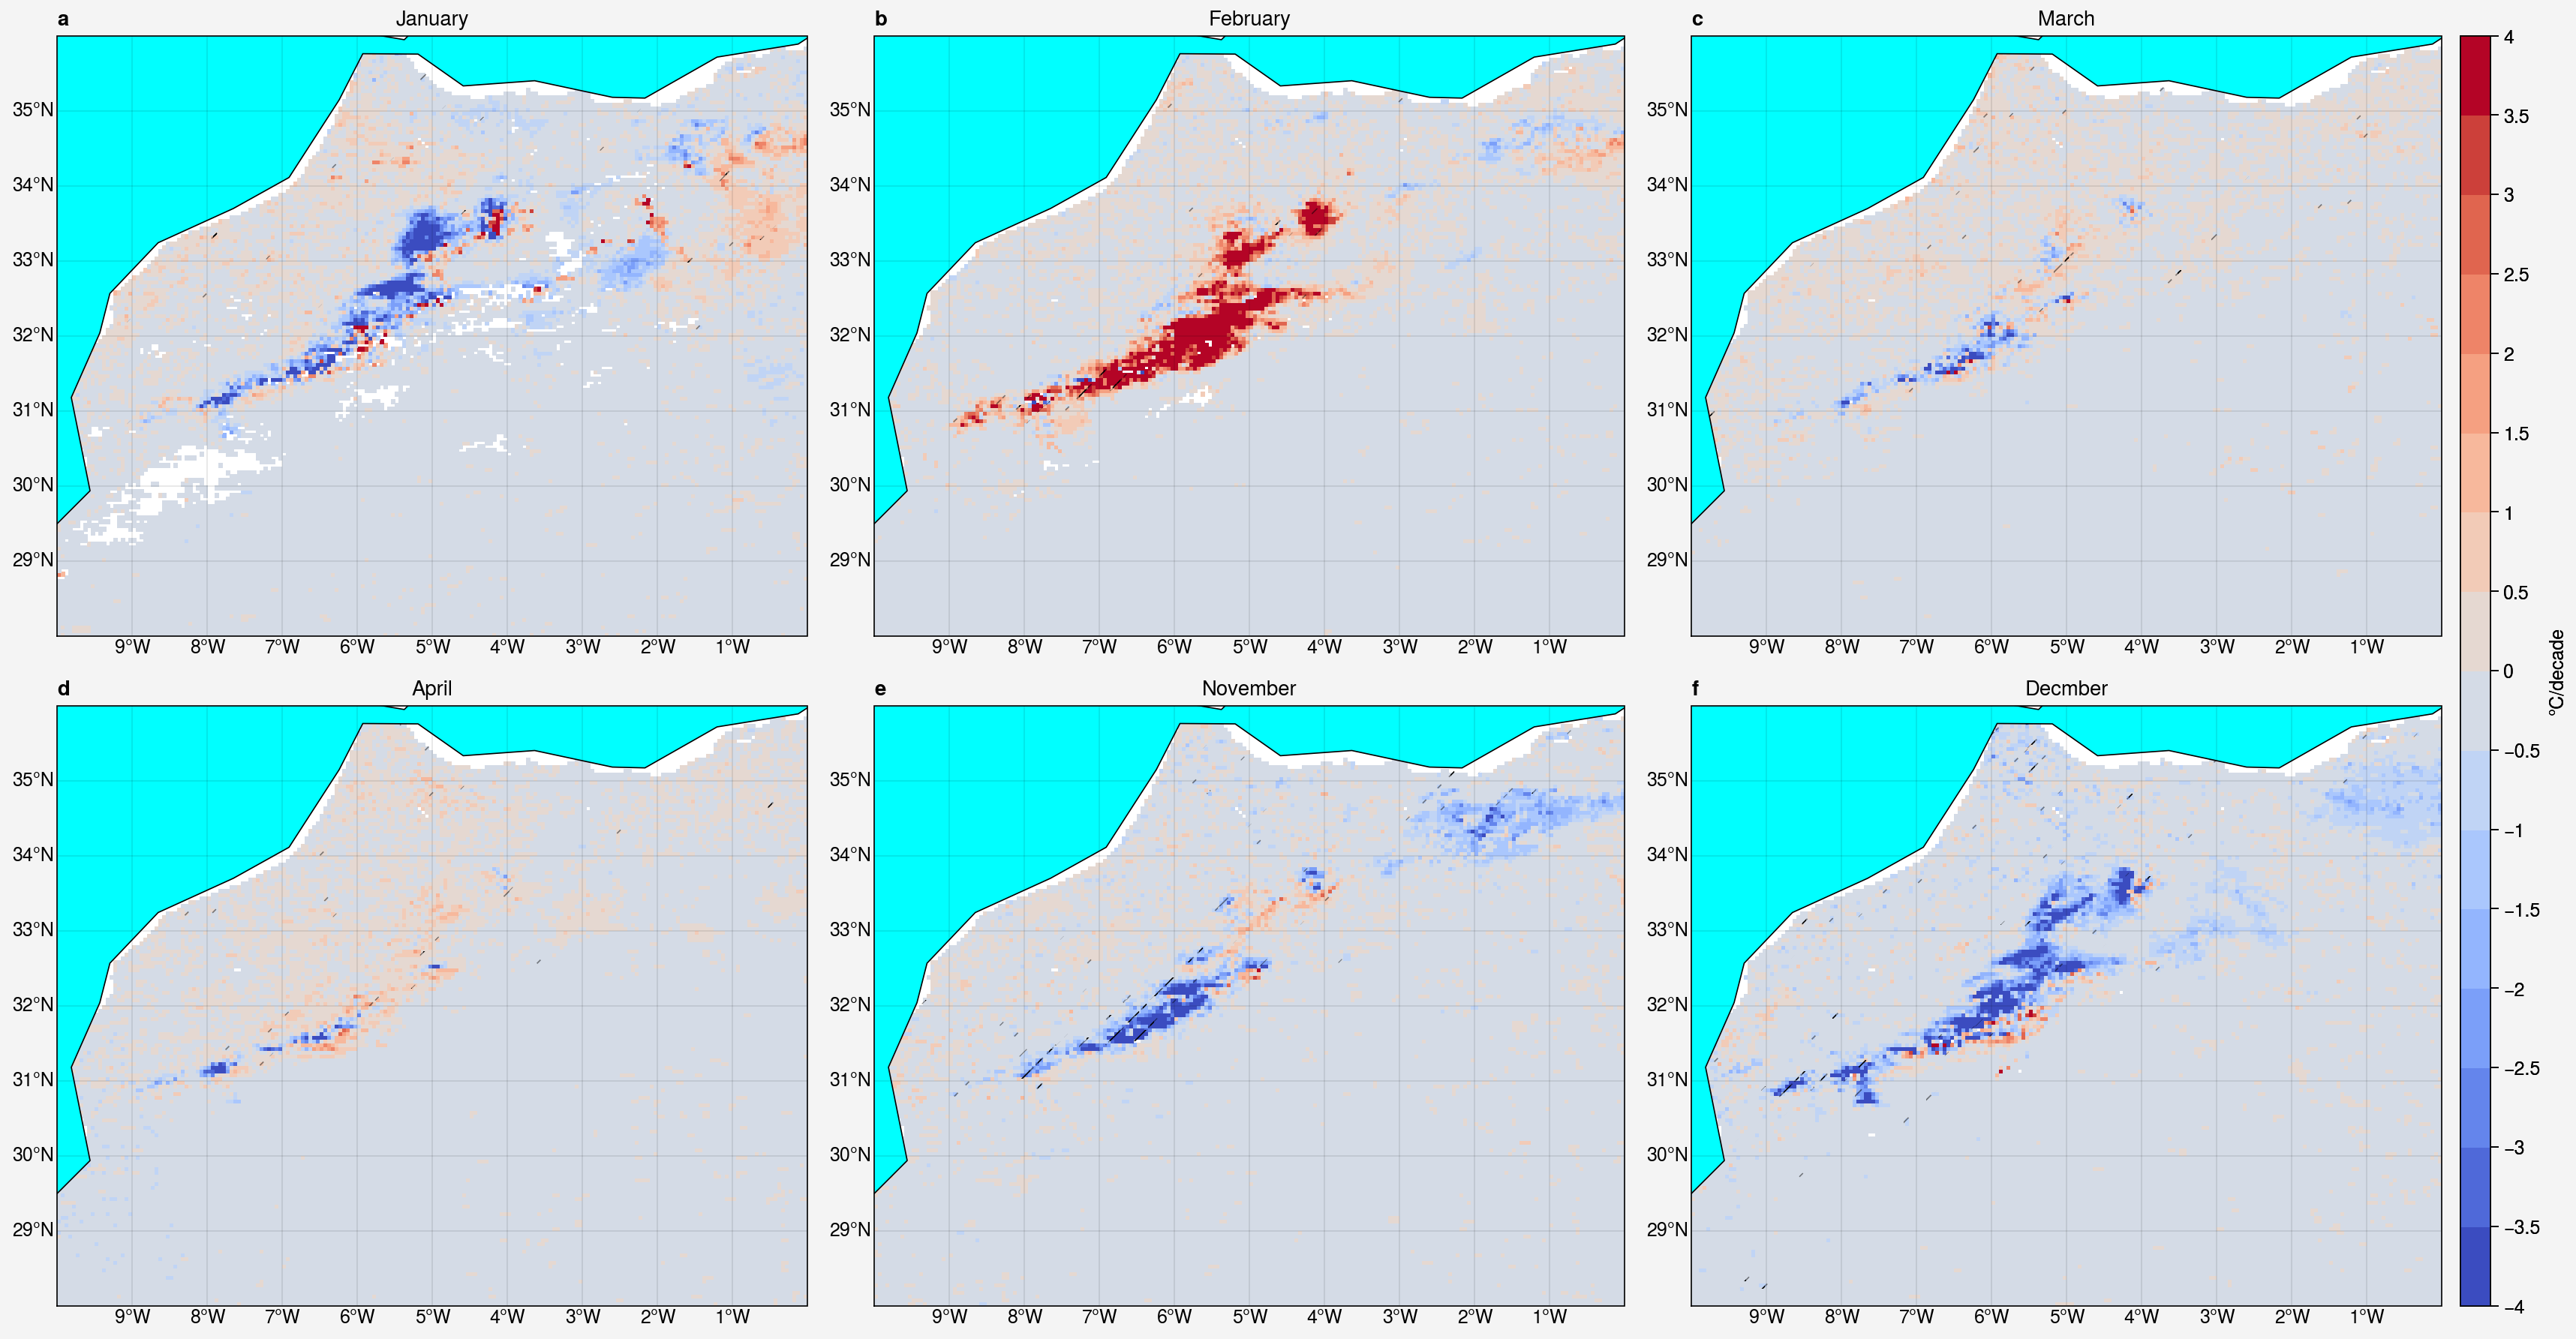

In [72]:
# Plote
# 1) # Masking significativity
signif=np.where(pvalue_scfv<0.05, True,False)

# Levels of scfv for the plot
levels=np.arange(-4,4.5,0.5)
factor=10 # degree per decade

title = {1: "January", 2:"February", 3:"March", 4:"April", 5:"November", 6:"Decmber"}   
# Producing the map of the trends, excluding the borders of the domain.
f, axs = plot.subplots(proj='cyl',ncols=3, nrows=2, share=1, axwidth=5)
for i, ax in enumerate(axs):
    print('i='+str(i))
    print('ax='+str(ax))
    m = ax.pcolormesh(
        scfv.lon,scfv.lat,
        slope_scfv[i,:,:]*factor,
        levels=levels,
        cmap='coolwarm'  
    )
    ax.format(title=title[i+1])   # font.largesize=='20px'
    
    p = ax.contourf(
    scfv.lon,scfv.lat,
    signif[i,:,:],
    hatches=["", "//"], alpha=0
    )
    
f.colorbar(m, label= '°C/decade')

axs.format(
    labels=True,
    coast=True, ocean=True, oceancolor='cyan', landcolor='bisque',borders=False,
    lonlines=1, latlines=1, abc=True, latlim=(28, 36), lonlim=(-10, 0)
)

plt.show()

<h1 style="font-size:1.2rem; color:black;"> Yearly trends   </h1>   

In [81]:
mean=scfv.mean(dim=['lat','lon'], skipna=True).groupby('time.year').mean(dim='time')

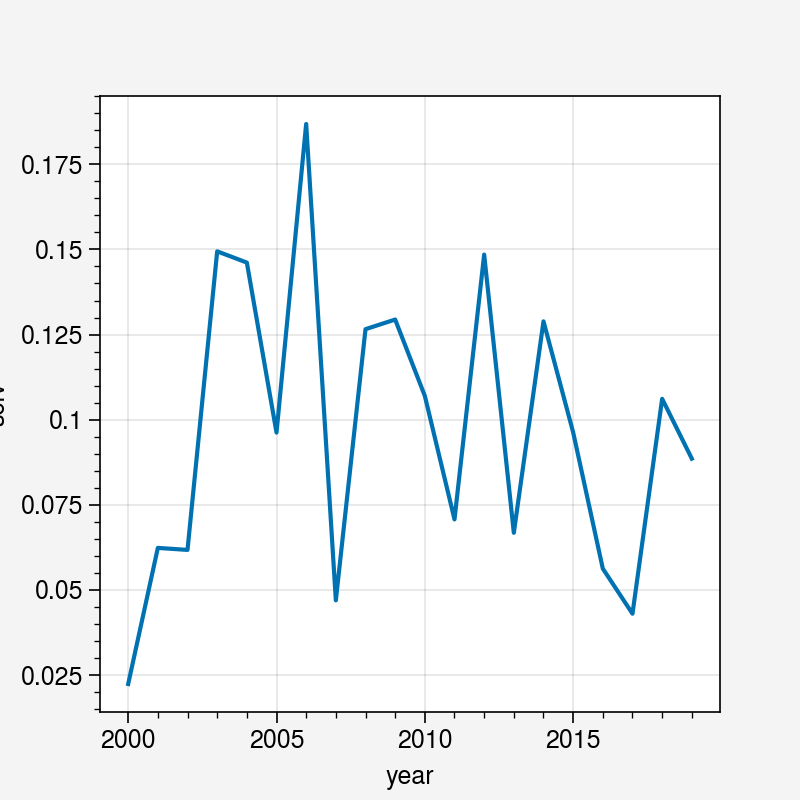

In [84]:
mean.plot()

## ==================================================================
## ==================================================================

<h1 style="font-size:3rem; color:blue;"> 2. Snow climatology using the product ESA CCI Viewable snow product level L3C daily from AVHRR over the period 1982-2019 in the Mediterranean area, this time by replacing the missing values using linear temporal gapfill  </h1> 

## 2.1) Linear temporal gapfill

In [ ]:
scf_subset

In [ ]:
latlons = [[30, -7], [31, -8], [30, -8], [31, -7], [32, -8]]

fig, axs = plot.subplots(nrows=2, ncols=len(latlons))

for i, latlon in enumerate(latlons):
    axs[0, i].scatter(scf_subset.time.values, scf_subset.sel(lon=latlon[1], lat=latlon[0], method='nearest'))
    axs[1, i].plot(scf_subset.sel(lon=latlon[1], lat=latlon[0], method='nearest').interpolate_na('time', method='linear'))  